# Testes da rotina da classe do Mapa de Hénon

## 1. Importando as bibliotecas necessárias

### Bibliotecas obrigatórias

In [8]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 150

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

plt.style.use("dark_background")

### Bibliotecas não-obrigatórias

In [9]:
import sys 
sys.path.insert(0, '../../../scripts')
import henonmap as hm

## 2. Definindo a classe (debug)

Não é necessário executar essa linha se você estiver importando o arquivo com a classe.

In [10]:
class MapaHenon:

    def __init__(self, estado_inicial, a=1.4, b=0.3):
        """
        Descrição:
        ----------
        Construtor da classe 'MapaHenon'

        Parâmetros:
        -----------
        estado_inicial: np.ndarray
            Parâmetro das posições xy iniciais do mapa e do instante n inicial (deve ser 0)
        a: float
            Parâmetro do Mapa de Hénon
        b: float
            Parâmetro do Mapa de Hénon
            
        Retorna:
        --------
        Nada
        """

        if not ((type(a) is float) & (type(b) is float)):
            raise TypeError("Os parâmetros devem ser floats!")
            
        if not (type(estado_inicial) is np.ndarray):
            raise TypeError("O vetor estado inicial deve ser um array do numpy!")
            
        if not (estado_inicial[2] == 0):
            raise ValueError("O instante inicial deve ser igual a 0!")

        self.__a = a
        self.__b = b
        self._x_atual = estado_inicial[0]
        self._y_atual = estado_inicial[1]
        self._n_atual = estado_inicial[2]
        pass

    def iterar(self):
        """
        Descrição:
        ----------
        Aplicar as equações de diferenças do Mapa e Hénon para os pontos e parâmetrs atuais

        Parâmetros:
        -----------
        Nenhum
        
        Retorna:
        --------
        Nada
        """

        a = self.__a
        b = self.__b
        x = self._x_atual
        y = self._y_atual
        n = self._n_atual

        prox_x = 1 - a*(x**2) + y
        prox_y = b*x
        self._x_atual = prox_x
        self._y_atual = prox_y
        self._n_atual = n + 1
        pass

    def ler_estado(self):
        """
        Descrição:
        ----------
        Retorna o estado atual (x, y, n) do mapa

        Parâmetros:
        -----------
        Nenhum
        
        Retorna:
        --------
        Um np.ndarray com as coordenadas (x, y, n) atuais do mapa
        """

        x = self._x_atual
        y = self._y_atual
        n = self._n_atual

        estado = np.array([x, y, n])
        return estado

## 3. Testando

In [11]:
a = 1.4
b = 0.3
x_inicial = 1.0
y_inicial = 0.0
n_inicial = 0

estados = np.array([x_inicial, y_inicial, n_inicial])

mapa = hm.MapaHenon(estado_inicial=estados)

In [12]:
n_iteracoes = 100000

for n in range(0, n_iteracoes):
    mapa.iterar()
    estados = np.vstack((estados, mapa.ler_estado()))

In [13]:
x = estados[:, 0]
y = estados[:, 1]
n = estados[:, 2]

### 3.a Mapa 

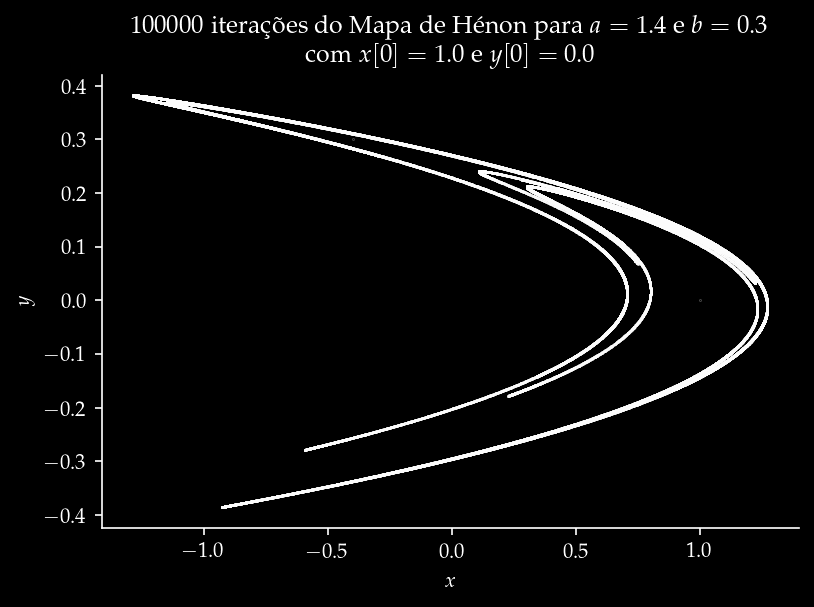

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='White', s = 0.05, marker=".")

ax.set_title(str(n_iteracoes) + " iterações do Mapa de Hénon para $a =$ " + str(a) + " e $b =$ " + str(b) + "\n com $x[0] =$ " + str(x[0]) + " e $y[0] =$ " + str(y[0]))
ax.set_ylabel('$y$')
ax.set_xlabel('$x$')
    
ax.grid(False)
sns.despine()
plt.show()
fig.savefig("../../../images/caos/henon-map/mapa-de-henon.png")

### 3.b Série Temporal

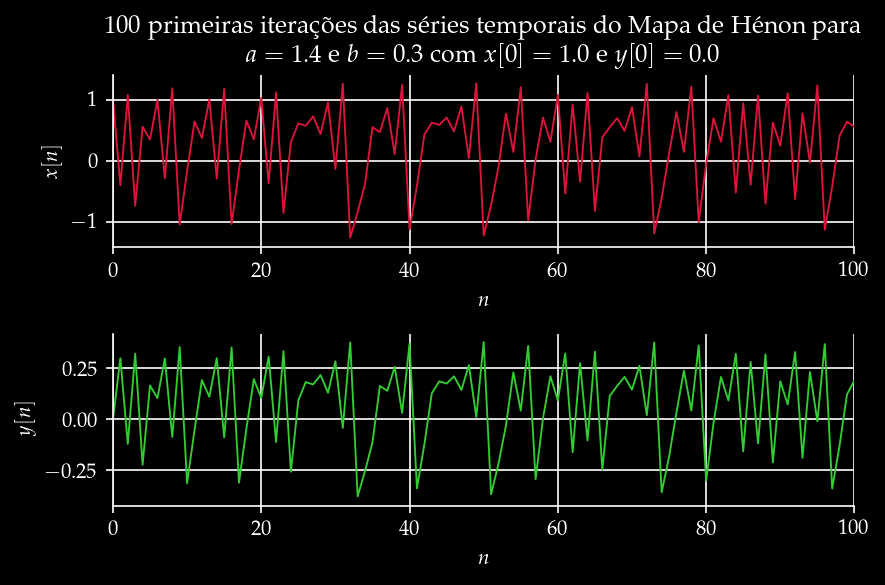

In [15]:
fig, ax = plt.subplots(2)
ax[0].plot(n, x, color='Crimson', linewidth=0.9)

ax[0].set_title("100 primeiras iterações das séries temporais do Mapa de Hénon para\n $a =$ " + str(a) + " e $b =$ " + str(b) + " com $x[0] =$ " + str(x[0]) + " e $y[0] =$ " + str(y[0]))
ax[0].set_ylabel('$x[n]$')
ax[0].set_xlabel('$n$')
ax[0].set_xlim(0, 100)
    
ax[0].grid(True)

ax[1].plot(n, y, color='LimeGreen', linewidth=0.9)
ax[1].set_ylabel('$y[n]$')
ax[1].set_xlabel('$n$')
ax[1].set_xlim(0, 100)
ax[1].grid(True)

fig.tight_layout()
sns.despine()
plt.show()
fig.savefig("../../../images/caos/henon-map/series-temporais.png")